In [2]:
import numpy as np
import pandas as pd

In [3]:
pheno_infname = 'phenotype_HY277.txt'
# pheno_infname = 'baseHY-277_v2_77.txt'

in_data_df = pd.read_csv(pheno_infname, sep='\t', dtype={'HospitalID': str})
in_data_df.head()

,SampleName,HospitalID,HDSampleID,ManualSevereType,Severity,ClinicResult,SysSevereType,LastTimeOfSysSevereType,Gender,Age,...,TnIUltra,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,IL6,PCT
0,1,0000223383,D2002002751,Ordinary,A,Discharged,2.0,2020-02-12,1.0,51.0,...,NaN,86.3,881.0,48.9,499.0,1.45,33.7,343.0,10.43,0.16
1,2,0000223107,D2002002752,Ordinary,A,Discharged,2.0,2020-01-23,1.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.17,0.22
2,3,0000222709,D2002002753,Severe,B,Discharged,NaN,NaN,0.0,65.0,...,0.013,66.4,551.0,47.3,392.0,2.83,16.7,139.0,NaN,0.16
3,4,0000222995,D2002002754,Critical,B,Death,4.0,2020-02-16,1.0,63.0,...,11.369,30.3,93.0,18.7,58.0,1.72,10.9,33.0,79.45,0.12
4,5,0000223113,D2002002755,Ordinary,A,Discharged,2.0,2020-01-27,1.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92,0.25


In [4]:
in_data_df.columns

Index(['SampleName', 'HospitalID', 'HDSampleID', 'ManualSevereType',
       'Severity', 'ClinicResult', 'SysSevereType', 'LastTimeOfSysSevereType',
       'Gender', 'Age', 'HGB', 'LYMPH#', 'PLT', 'RBC', 'WBC', 'APTT', 'D-DIC',
       'FIB', 'PT', 'TT', '5NT', 'ALP', 'Ca*Pi', 'Ca++', 'CHE', 'CL', 'GGT',
       'K', 'LDH', 'MAO', 'Mg', 'Na', 'Pi-', 'A/G', 'ALB', 'ALT', 'AST',
       'AST/ALT', 'Bc-TR', 'DB', 'GLO', 'ID', 'm-AST', 'PA', 'TB', 'TBA', 'TP',
       'FIO2', 'Lac', 'LACT', 'O2AT', 'PCO2', 'PH', 'PO2', 'AG', 'CHOL', 'CO2',
       'Cr', 'CRP', 'Cys-C', 'eGFR', 'ESR30', 'HDL', 'LDL', 'TG', 'U/C', 'UA',
       'Urea', 'β2-M', 'BNP', 'CK', 'CKMB', 'CTNT', 'HBDH', 'HCY', 'IMA-3V',
       'MYO', 'TnIUltra', 'T-CELL', 'Tc-Count', 'Th-Cell', 'Th-Count', 'TH/TS',
       'Ts-Cell', 'Ts-Count', 'IL6', 'PCT'],
      dtype='object')

In [3]:
col_names = ['HospitalID', 'ManualSevereType','Severity','Gender','Age']
fisrt_labs = [x for x in list(in_data_df.columns) if x.endswith('.x') and x != '检验日期.x']
fisrt_labs_f = np.array(col_names + fisrt_labs)

# get the specific columns
sel_data_df = in_data_df[fisrt_labs_f].copy()
sel_data_df.head()

,HospitalID,ManualSevereType,Severity,Gender,Age,RBC.x,HGB.x,WBC.x,PLT.x,LYMPH#.x,...,TG.x,PCT.x,CRP.x,ESR30.x,IL6.x,MONO#.x,NEUT#.x,EO#.x,Pct1.x,IgE.x
0,0000223383,Ordinary,A,1.0,51.0,5.15,158.0,3.53,156.0,0.99,...,NaN,0.16,11.7,20.0,10.43,0.49,2.04,0.00,0.058,NaN
1,0000223107,Ordinary,A,1.0,35.0,4.49,136.0,4.62,236.0,1.59,...,1.21,0.22,35.6,29.0,15.17,0.39,2.62,0.02,0.029,NaN
2,0000222709,Severe,B,0.0,65.0,3.96,122.0,4.31,161.0,0.88,...,1.12,0.16,52.6,85.0,NaN,0.30,3.13,0.00,0.048,NaN
3,0000222995,Critical,B,1.0,63.0,5.64,170.0,6.79,119.0,0.31,...,1.17,0.12,89.94,14.0,79.45,0.22,6.31,0.00,9.18,98.0
4,0000223113,Ordinary,A,1.0,36.0,5.05,151.0,13.55,250.0,2.37,...,NaN,0.25,5.8,4.0,1.92,0.65,10.49,0.01,<0.020,NaN


In [4]:
# find columns being string data type
col_inx_has_str = [idx for idx,x in enumerate(sel_data_df.dtypes) if x != 'float64' and idx > 2]

# get the string-type column name
fisrt_labs_f[col_inx_has_str]

array(['D-DIC.x', '2019-nCoV.x', 'INF AV-PCR.x', 'INF BV-PCR.x',
       'RSV-PCR.x', 'GGT.x', 'ALT.x', 'TnIUltra.x', 'BNP.x', 'CRP.x',
       'IL6.x', 'Pct1.x'], dtype='<U16')

In [5]:
# string data processing

# extract float value
float_regex = r'([+-]?\d+\.\d+|\d+)'
sel_data_df['D-DIC.x'] = sel_data_df['D-DIC.x'].str.extract(float_regex, expand=False)
sel_data_df['D-DIC.x'] = sel_data_df['D-DIC.x'].astype(float)

# replace data value
sel_data_df['2019-nCoV.x'] = sel_data_df['2019-nCoV.x'].str.replace(r'.*阴性.*', '0')
sel_data_df['2019-nCoV.x'] = sel_data_df['2019-nCoV.x'].str.replace(r'.*阳性.*', '1')
sel_data_df['2019-nCoV.x'] = sel_data_df['2019-nCoV.x'].astype(float)

sel_data_df['INF AV-PCR.x'] = sel_data_df['INF AV-PCR.x'].str.replace(r'.*阴性.*', '0')
sel_data_df['INF AV-PCR.x'] = sel_data_df['INF AV-PCR.x'].str.replace(r'.*阳性.*', '1')
sel_data_df['INF AV-PCR.x'] = sel_data_df['INF AV-PCR.x'].astype(float)

sel_data_df['INF BV-PCR.x'] = sel_data_df['INF BV-PCR.x'].str.replace(r'.*阴性.*', '0')
sel_data_df['INF BV-PCR.x'] = sel_data_df['INF BV-PCR.x'].str.replace(r'.*阳性.*', '1')
sel_data_df['INF BV-PCR.x'] = sel_data_df['INF BV-PCR.x'].astype(float)

sel_data_df['RSV-PCR.x'] = sel_data_df['RSV-PCR.x'].str.replace(r'.*阴性.*', '0')
sel_data_df['RSV-PCR.x'] = sel_data_df['RSV-PCR.x'].str.replace(r'.*阳性.*', '1')
sel_data_df['RSV-PCR.x'] = sel_data_df['RSV-PCR.x'].astype(float)

sel_data_df['GGT.x'] = sel_data_df['GGT.x'].str.extract(float_regex, expand=False)
sel_data_df['GGT.x'] = sel_data_df['GGT.x'].astype(float)

sel_data_df['ALT.x'] = sel_data_df['ALT.x'].str.extract(float_regex, expand=False)
sel_data_df['ALT.x'] = sel_data_df['ALT.x'].astype(float)

sel_data_df['TnIUltra.x'] = sel_data_df['TnIUltra.x'].str.extract(float_regex, expand=False)
sel_data_df['TnIUltra.x'] = sel_data_df['TnIUltra.x'].astype(float)

sel_data_df['BNP.x'] = sel_data_df['BNP.x'].str.extract(float_regex, expand=False)
sel_data_df['BNP.x'] = sel_data_df['BNP.x'].astype(float)

sel_data_df['CRP.x'] = sel_data_df['CRP.x'].str.extract(float_regex, expand=False)
sel_data_df['CRP.x'] = sel_data_df['CRP.x'].astype(float)

sel_data_df['IL6.x'] = sel_data_df['IL6.x'].str.extract(float_regex, expand=False)
sel_data_df['IL6.x'] = sel_data_df['IL6.x'].astype(float)

sel_data_df['Pct1.x'] = sel_data_df['Pct1.x'].str.extract(float_regex, expand=False)
sel_data_df['Pct1.x'] = sel_data_df['Pct1.x'].astype(float)


In [6]:
# calculate the nan counts for each column
dd = pd.DataFrame(sel_data_df.isnull().sum())
dd

,0
HospitalID,0
ManualSevereType,3
Severity,3
Gender,3
Age,3
...,...
MONO#.x,67
NEUT#.x,67
EO#.x,67
Pct1.x,92


In [7]:
# find columns having nan values (the number of nan > rate*len(df))
rate = 0.5
col_inx_has_nan = [idx for idx,x in enumerate(sel_data_df.isnull().sum()) if x > rate * len(sel_data_df)]

# get the filter-out columns
print(len(fisrt_labs_f[col_inx_has_nan]))
fisrt_labs_f[col_inx_has_nan]

38


array(['2019-nCoV.x', 'ALP.x', '5NT.x', 'm-AST.x', 'Bc-TR.x', 'MAO.x',
       'CHE.x', 'PA.x', 'LACT.x', 'UA.x', 'Cys-C.x', 'β2-M.x', 'Ca*Pi.x',
       'Mg.x', 'Pi-.x', 'IMA-3V.x', 'TnIUltra.x', 'HCY.x', 'CK.x',
       'BNP.x', 'CKMB.x', 'HBDH.x', 'MYO.x', 'SOD-H.x', 'CTNT.x',
       'T-CELL.x', 'Tc-Count.x', 'Th-Cell.x', 'Th-Count.x', 'Ts-Cell.x',
       'Ts-Count.x', 'TH/TS.x', 'CHOL.x', 'HDL.x', 'LDL.x', 'TG.x',
       'IL6.x', 'IgE.x'], dtype='<U16')

In [8]:
# get the remain columns
remain_col_inx = list(set(range(len(fisrt_labs_f))) - set(col_inx_has_nan))
remain_col_inx.sort()
print(len(remain_col_inx))
final_colnames = fisrt_labs_f[remain_col_inx]
print(final_colnames)

# obtain the final datafram
final_data_df = sel_data_df[final_colnames].copy()

final_data_df.head()

48
['HospitalID' 'ManualSevereType' 'Severity' 'Gender' 'Age' 'RBC.x' 'HGB.x'
 'WBC.x' 'PLT.x' 'LYMPH#.x' 'APTT.x' 'TT.x' 'PT.x' 'FIB.x' 'D-DIC.x'
 'INF AV-PCR.x' 'INF BV-PCR.x' 'RSV-PCR.x' 'AST.x' 'AST/ALT.x' 'GLO.x'
 'TBA.x' 'GGT.x' 'A/G.x' 'ID.x' 'ALB.x' 'ALT.x' 'DB.x' 'LDH.x' 'TB.x'
 'TP.x' 'Urea.x' 'U/C.x' 'eGFR.x' 'Cr.x' 'Na.x' 'CO2.x' 'K.x' 'CL.x'
 'Ca++.x' 'AG.x' 'PCT.x' 'CRP.x' 'ESR30.x' 'MONO#.x' 'NEUT#.x' 'EO#.x'
 'Pct1.x']


,HospitalID,ManualSevereType,Severity,Gender,Age,RBC.x,HGB.x,WBC.x,PLT.x,LYMPH#.x,...,CL.x,Ca++.x,AG.x,PCT.x,CRP.x,ESR30.x,MONO#.x,NEUT#.x,EO#.x,Pct1.x
0,0000223383,Ordinary,A,1.0,51.0,5.15,158.0,3.53,156.0,0.99,...,NaN,1.17,NaN,0.16,11.70,20.0,0.49,2.04,0.00,0.058
1,0000223107,Ordinary,A,1.0,35.0,4.49,136.0,4.62,236.0,1.59,...,NaN,1.09,NaN,0.22,35.60,29.0,0.39,2.62,0.02,0.029
2,0000222709,Severe,B,0.0,65.0,3.96,122.0,4.31,161.0,0.88,...,105.0,1.09,10.95,0.16,52.60,85.0,0.30,3.13,0.00,0.048
3,0000222995,Critical,B,1.0,63.0,5.64,170.0,6.79,119.0,0.31,...,98.7,1.01,13.25,0.12,89.94,14.0,0.22,6.31,0.00,9.180
4,0000223113,Ordinary,A,1.0,36.0,5.05,151.0,13.55,250.0,2.37,...,NaN,1.22,NaN,0.25,5.80,4.0,0.65,10.49,0.01,0.020


In [35]:
final_colnames

array(['HospitalID', 'ManualSevereType', 'Severity', 'Gender', 'Age',
       'RBC.x', 'HGB.x', 'WBC.x', 'PLT.x', 'LYMPH#.x', 'APTT.x', 'TT.x',
       'PT.x', 'FIB.x', 'D-DIC.x', 'INF AV-PCR.x', 'INF BV-PCR.x',
       'RSV-PCR.x', 'AST.x', 'AST/ALT.x', 'GLO.x', 'TBA.x', 'GGT.x',
       'A/G.x', 'ID.x', 'ALB.x', 'ALT.x', 'DB.x', 'LDH.x', 'TB.x', 'TP.x',
       'Urea.x', 'U/C.x', 'eGFR.x', 'Cr.x', 'Na.x', 'CO2.x', 'K.x',
       'CL.x', 'Ca++.x', 'AG.x', 'PCT.x', 'CRP.x', 'ESR30.x', 'MONO#.x',
       'NEUT#.x', 'EO#.x', 'Pct1.x'], dtype='<U16')

In [9]:
# find the patient without ManualSevereType
final_data_df[final_data_df['ManualSevereType'].isnull()]

,HospitalID,ManualSevereType,Severity,Gender,Age,RBC.x,HGB.x,WBC.x,PLT.x,LYMPH#.x,...,CL.x,Ca++.x,AG.x,PCT.x,CRP.x,ESR30.x,MONO#.x,NEUT#.x,EO#.x,Pct1.x
101,0000223111,NaN,NaN,1.0,10.42,4.92,137.0,6.72,196.0,3.79,...,NaN,NaN,NaN,0.21,5.00,NaN,0.55,2.26,0.11,0.020
120,0000223568,NaN,NaN,0.0,51.00,4.46,127.0,2.82,163.0,0.89,...,107.0,1.12,11.95,0.16,0.81,35.0,0.26,1.63,0.03,0.023
215,0000224097,NaN,NaN,0.0,30.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
final_data_df = final_data_df[~final_data_df['ManualSevereType'].isnull()].reset_index(drop=True)
final_data_df.head()

,HospitalID,ManualSevereType,Severity,Gender,Age,RBC.x,HGB.x,WBC.x,PLT.x,LYMPH#.x,...,CL.x,Ca++.x,AG.x,PCT.x,CRP.x,ESR30.x,MONO#.x,NEUT#.x,EO#.x,Pct1.x
0,0000223383,Ordinary,A,1.0,51.0,5.15,158.0,3.53,156.0,0.99,...,NaN,1.17,NaN,0.16,11.70,20.0,0.49,2.04,0.00,0.058
1,0000223107,Ordinary,A,1.0,35.0,4.49,136.0,4.62,236.0,1.59,...,NaN,1.09,NaN,0.22,35.60,29.0,0.39,2.62,0.02,0.029
2,0000222709,Severe,B,0.0,65.0,3.96,122.0,4.31,161.0,0.88,...,105.0,1.09,10.95,0.16,52.60,85.0,0.30,3.13,0.00,0.048
3,0000222995,Critical,B,1.0,63.0,5.64,170.0,6.79,119.0,0.31,...,98.7,1.01,13.25,0.12,89.94,14.0,0.22,6.31,0.00,9.180
4,0000223113,Ordinary,A,1.0,36.0,5.05,151.0,13.55,250.0,2.37,...,NaN,1.22,NaN,0.25,5.80,4.0,0.65,10.49,0.01,0.020


In [11]:
final_data_df.shape

(274, 48)

In [34]:
final_data_df['ManualSevereType'].value_counts()

Ordinary    198
Severe       50
Critical     15
Light        11
Name: ManualSevereType, dtype: int64

In [12]:
# convert Severity into ordinary value
ord_val = {'Light': 1, 'Ordinary': 2, 'Severe': 3, 'Critical': 4}       

final_data_df['Label'] = final_data_df['ManualSevereType'].apply(lambda x: ord_val[x])
final_data_df.head()

,HospitalID,ManualSevereType,Severity,Gender,Age,RBC.x,HGB.x,WBC.x,PLT.x,LYMPH#.x,...,Ca++.x,AG.x,PCT.x,CRP.x,ESR30.x,MONO#.x,NEUT#.x,EO#.x,Pct1.x,Label
0,0000223383,Ordinary,A,1.0,51.0,5.15,158.0,3.53,156.0,0.99,...,1.17,NaN,0.16,11.70,20.0,0.49,2.04,0.00,0.058,2
1,0000223107,Ordinary,A,1.0,35.0,4.49,136.0,4.62,236.0,1.59,...,1.09,NaN,0.22,35.60,29.0,0.39,2.62,0.02,0.029,2
2,0000222709,Severe,B,0.0,65.0,3.96,122.0,4.31,161.0,0.88,...,1.09,10.95,0.16,52.60,85.0,0.30,3.13,0.00,0.048,3
3,0000222995,Critical,B,1.0,63.0,5.64,170.0,6.79,119.0,0.31,...,1.01,13.25,0.12,89.94,14.0,0.22,6.31,0.00,9.180,4
4,0000223113,Ordinary,A,1.0,36.0,5.05,151.0,13.55,250.0,2.37,...,1.22,NaN,0.25,5.80,4.0,0.65,10.49,0.01,0.020,2


# Create dataset for training

In [13]:
y = final_data_df['Label'].values
X_df = final_data_df.drop(columns=['HospitalID', 'ManualSevereType', 'Severity', 'Label']).copy()
X_col_name = list(X_df.columns)
X = X_df.values

# Missing value impute

install missingpy
https://pypi.org/project/missingpy/


In [14]:
from missingpy import MissForest

imputer = MissForest(random_state=1337)
X_imped = imputer.fit_transform(X)

Iteration: 0
Iteration: 1
Iteration: 2


In [15]:
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_imped_norm = scaler.fit_transform(X_imped)

# X_df_imped_norm = pd.DataFrame(X_imped_norm, columns=X_col_name) # XGB可以不用作normalization

X_df_imped_norm = pd.DataFrame(X_imped, columns=X_col_name)
X_df_imped_norm.head()

,Gender,Age,RBC.x,HGB.x,WBC.x,PLT.x,LYMPH#.x,APTT.x,TT.x,PT.x,...,CL.x,Ca++.x,AG.x,PCT.x,CRP.x,ESR30.x,MONO#.x,NEUT#.x,EO#.x,Pct1.x
0,1.0,51.0,5.15,158.0,3.53,156.0,0.99,41.0,15.5,12.9,...,103.880,1.17,10.9342,0.16,11.70,20.0,0.49,2.04,0.00,0.058
1,1.0,35.0,4.49,136.0,4.62,236.0,1.59,36.3,14.9,11.9,...,104.103,1.09,12.0269,0.22,35.60,29.0,0.39,2.62,0.02,0.029
2,0.0,65.0,3.96,122.0,4.31,161.0,0.88,37.9,15.5,12.6,...,105.000,1.09,10.9500,0.16,52.60,85.0,0.30,3.13,0.00,0.048
3,1.0,63.0,5.64,170.0,6.79,119.0,0.31,38.7,17.2,13.4,...,98.700,1.01,13.2500,0.12,89.94,14.0,0.22,6.31,0.00,9.180
4,1.0,36.0,5.05,151.0,13.55,250.0,2.37,27.9,16.2,11.9,...,103.731,1.22,10.7770,0.25,5.80,4.0,0.65,10.49,0.01,0.020


# Using Xgb as ordinary regression

In [16]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
data_dmatrix = xgb.DMatrix(data=X_df_imped_norm,label=y)

In [17]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
          'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)


cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.698078,0.009765,1.697621,0.021414
1,1.557156,0.009753,1.556795,0.022827
2,1.432060,0.009668,1.431883,0.024280
3,1.320668,0.009670,1.323302,0.023975
4,1.222724,0.009532,1.226897,0.024335


In [18]:
print((cv_results["test-rmse-mean"]).tail(1))

78    0.557751
Name: test-rmse-mean, dtype: float64


In [19]:
# xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
# xgb.plot_importance(xg_reg)
# plt.rcParams['figure.figsize'] = [10, 20]
# plt.show()

from xgboost import XGBRegressor 
xg_reg = XGBRegressor(**params)
xg_reg.fit(X_df_imped_norm, y)


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=10,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

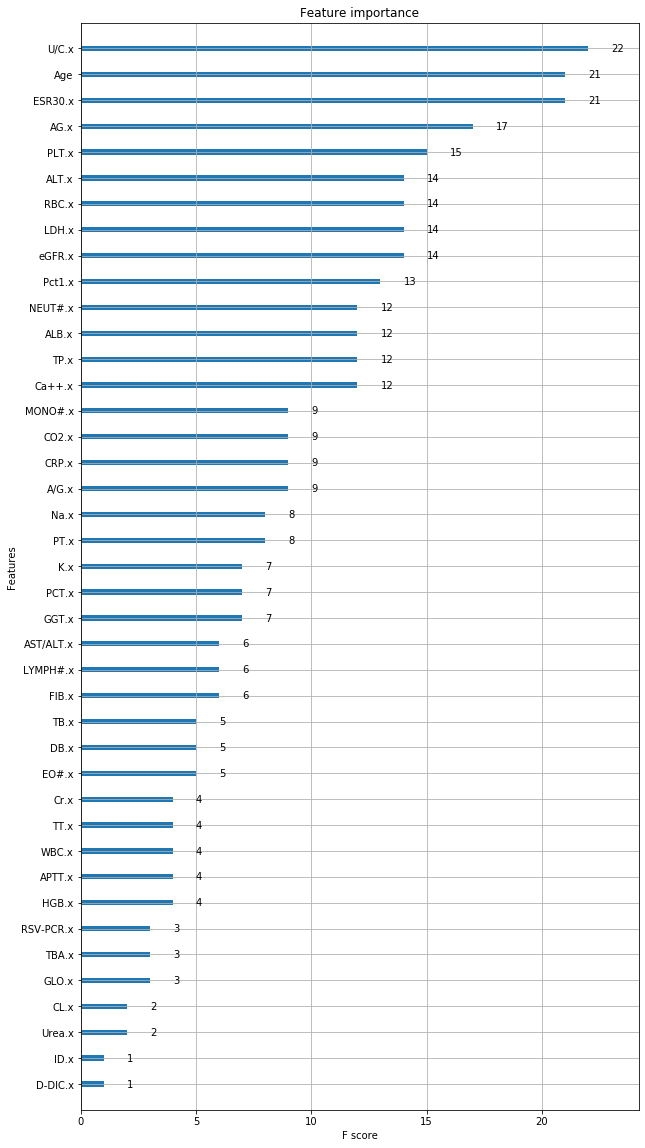

In [33]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 20]
xgb.plot_importance(xg_reg)


# Feature selection based on feature importance

In [21]:
feat_imp = xg_reg.feature_importances_

In [22]:
# select features whose importance greater than 0.01 

# lower_bound = 0.008

# sel_idx = [idx for idx, x in enumerate(feat_imp) if x >= lower_bound]
# sel_cols = np.array(X_col_name)[sel_idx]

# X_df_imped_norm_sel = X_df_imped_norm[sel_cols]
# X_df_imped_norm_sel.head()

In [23]:
# select top features
n_top = 20
top_indx = np.argsort(feat_imp)[::-1][:20]
sel_cols = np.array(X_col_name)[top_indx]
X_df_imped_norm_sel = X_df_imped_norm[sel_cols]
print(sel_cols)
X_df_imped_norm_sel.head()

['CRP.x' 'Age' 'eGFR.x' 'TP.x' 'CO2.x' 'PCT.x' 'Pct1.x' 'LYMPH#.x' 'ALT.x'
 'Cr.x' 'PLT.x' 'FIB.x' 'A/G.x' 'HGB.x' 'AG.x' 'GGT.x' 'D-DIC.x' 'NEUT#.x'
 'LDH.x' 'Ca++.x']


,CRP.x,Age,eGFR.x,TP.x,CO2.x,PCT.x,Pct1.x,LYMPH#.x,ALT.x,Cr.x,PLT.x,FIB.x,A/G.x,HGB.x,AG.x,GGT.x,D-DIC.x,NEUT#.x,LDH.x,Ca++.x
0,11.70,51.0,95.9171,79.2,27.403,0.16,0.058,0.99,19.0,75.48,156.0,3.84,1.7049,158.0,10.9342,22.6,0.24,2.04,400.0,1.17
1,35.60,35.0,112.2167,73.1,26.672,0.22,0.029,1.59,22.4,71.75,236.0,4.46,1.8127,136.0,12.0269,23.0,0.44,2.62,558.0,1.09
2,52.60,65.0,100.9700,73.3,26.900,0.16,0.048,0.88,26.6,45.00,161.0,5.61,1.5500,122.0,10.9500,17.8,0.65,3.13,662.0,1.09
3,89.94,63.0,26.4900,63.1,22.900,0.12,9.180,0.31,62.0,220.00,119.0,3.94,1.2500,170.0,13.2500,34.0,2.85,6.31,720.0,1.01
4,5.80,36.0,111.0607,86.2,28.639,0.25,0.020,2.37,30.0,71.33,250.0,3.64,1.8059,151.0,10.7770,20.8,0.22,10.49,491.0,1.22


In [37]:
sel_cols

array(['CRP.x', 'Age', 'eGFR.x', 'TP.x', 'CO2.x', 'PCT.x', 'Pct1.x',
       'LYMPH#.x', 'ALT.x', 'Cr.x', 'PLT.x', 'FIB.x', 'A/G.x', 'HGB.x',
       'AG.x', 'GGT.x', 'D-DIC.x', 'NEUT#.x', 'LDH.x', 'Ca++.x'],
      dtype='<U12')

# retrain model with selected features

In [24]:
xg_reg_ = XGBRegressor(**params)
xg_reg_.fit(X_df_imped_norm_sel, y)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=10,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

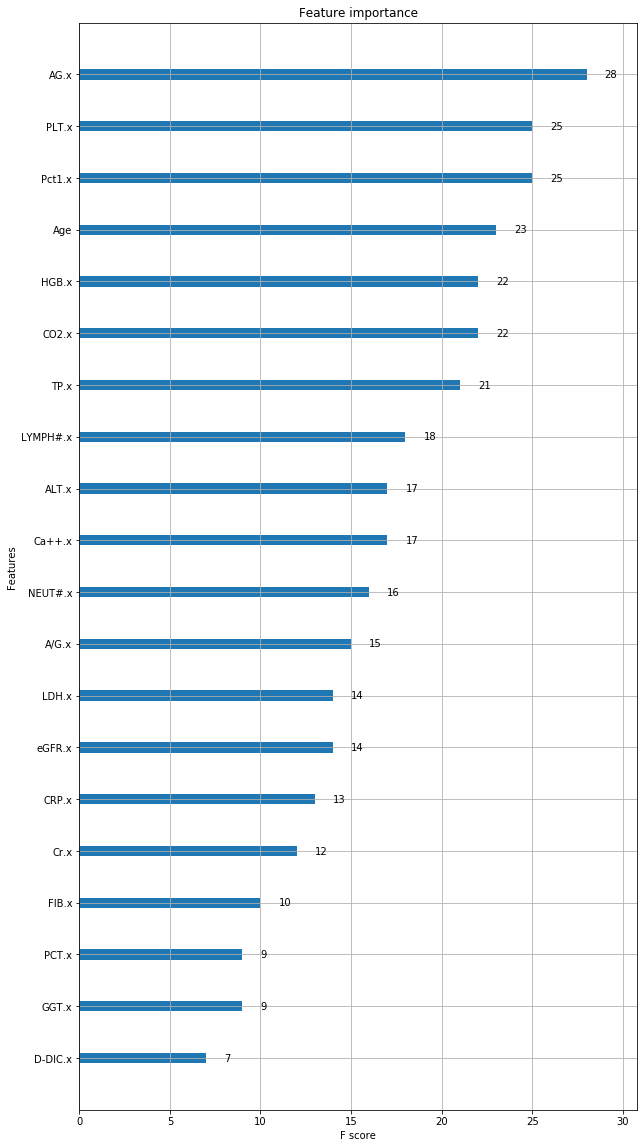

In [36]:
xgb.plot_importance(xg_reg_)

# Prediction

In [26]:
y_pred = xg_reg.predict(X_df_imped_norm)
y_pred_adj = np.array([1 if x < 1 else 4 if x > 4 else x for x in y_pred ])
y_pred_adj_lab = np.round(y_pred_adj)

In [42]:
pred_df = pd.DataFrame(data={'HospitalID': final_data_df['HospitalID'].values,
                            'ManualSevereType': final_data_df['ManualSevereType'].values,
                            #'Y_true': final_data_df['Label'].values,
                            'Score': y_pred_adj,
                            #'Y_pred_label': y_pred_adj_lab
                            })

In [43]:
pred_df

,HospitalID,ManualSevereType,Score
0,0000223383,Ordinary,2.257756
1,0000223107,Ordinary,2.282180
2,0000222709,Severe,2.729397
3,0000222995,Critical,3.133799
4,0000223113,Ordinary,1.873631
...,...,...,...
269,0000224248,Ordinary,1.958137
270,0000224245,Ordinary,2.045670
271,0000223924,Ordinary,1.960531
272,0000223790,Ordinary,2.035618


In [44]:
pred_df.to_csv('xgb_score.dat', sep='\t', index=False)

In [29]:
from sklearn.metrics import recall_score, precision_score
y_t = pred_df['Y_true'].values
y_p_p = pred_df['Y_pred'].values
y_p_l = pred_df['Y_pred_label'].values

avg_recall = recall_score(y_t, y_p_l, average="weighted")
print('mean recall: {}'.format(avg_recall))
print('mean precision: {}'.format(average_precision))

mean recall: 0.8357664233576643
mean precision: 0.8


/Users/yong/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
